## Identify key regions of Northern and Southern Strait shared amongst the 4 years

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
#from matplotlib import reload
import xarray as xr
from xarray import Dataset as ds
import cmocean as cm
import sys
sys.path.append('..')
sys.path.append('../maps_signals')
import map_fxn as mf
import cluster_fxn as cf
%matplotlib inline
bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
grid = mf.import_bathy(bath)
fmask = (grid.fmask[0,0,:,:])
import colorsys
import scipy.io as sio
import cmocean 
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools,
    visualisations,
)

In [2]:
def clusters_spec_clusID(ax1,year,var,no_clusters,cluslist,colors,markersize,\
                 legfontsize,tit):

    fs = './datamats/' + var + '_' + year + 'hind_cl.mat'
    mat_contents = sio.loadmat(fs)
    cl = np.squeeze((mat_contents['clusters']))
    cl_this = cl[no_clusters-1,:]
    np.shape(cl_this)
    viz_tools.set_aspect(ax1)   
    fmask = (grid.fmask[0,0,:,:])    
    mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1, cmap = cm.cm.haline_r)


    ax1.set_ylim([0,898])
    ax1.set_xlim([0,398])

    stn_x, stn_y = mf.make_stns(10)
    d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)
    labels = ['N. Strait', 'C. Strait']
    for j in range(0,len(cluslist)):
        
        cluster = np.where(cl_this == cluslist[j])
        cluster = np.squeeze(cluster)
        #find the xs and ys of the stations in a given cluster
        c1_x = np.take(d_stn_x,cluster)
        c1_y = np.take(d_stn_y,cluster)
        pts = ax1.scatter(c1_x,c1_y,s=markersize,c=colors[j-1], label=labels[j] ,marker='o')
        ax1.set_xticklabels( () ) 
        ax1.set_yticklabels( () ) 
    plt.legend(loc=1, fontsize = legfontsize)
    ax1.set_title(tit,fontsize = legfontsize + 2)

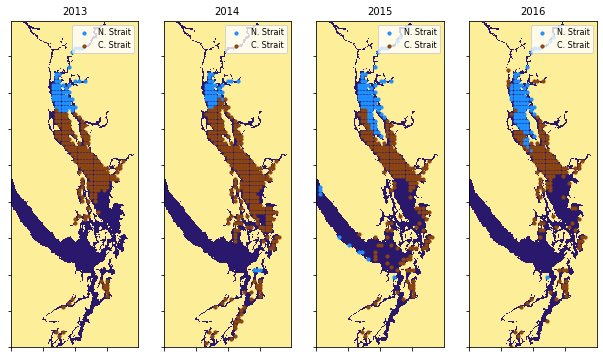

In [3]:
fact = 1.4
ms = 4
markersize = 10
legfontsize = 8

fig = plt.figure(figsize=(7.5*fact, 10*fact))
colors = ['saddlebrown','dodgerblue']
#####FWI
#2013 bio - cluslist [1 2 ]
ax1 = plt.subplot2grid((1,4),(0,0))

clusters_spec_clusID(ax1,'2013','bio',5,[1, 2],colors,markersize,\
                 legfontsize,'2013')

ax1 = plt.subplot2grid((1,4),(0,1))

clusters_spec_clusID(ax1,'2014','bio',5,[1, 2],colors,markersize,\
                 legfontsize,'2014')

ax1 = plt.subplot2grid((1,4),(0,2))

clusters_spec_clusID(ax1,'2015','bio',5,[3, 2],colors,markersize,\
                 legfontsize,'2015')

ax1 = plt.subplot2grid((1,4),(0,3))

clusters_spec_clusID(ax1,'2016','bio',5,[3, 1],colors,markersize,\
                 legfontsize,'2016')

In [4]:
def clusters_spec_clusTUP(year,var,no_clusters,clustID):

    fs = './datamats/' + var + '_' + year + 'hind_cl.mat'
    mat_contents = sio.loadmat(fs)
    cl = np.squeeze((mat_contents['clusters']))
    cl_this = cl[no_clusters-1,:]
    np.shape(cl_this)
    viz_tools.set_aspect(ax1)   
    fmask = (grid.fmask[0,0,:,:])    
    mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1, cmap = cm.cm.haline_r)


    ax1.set_ylim([0,898])
    ax1.set_xlim([0,398])

    stn_x, stn_y = mf.make_stns(10)
    d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)
    
    cluster = np.where(cl_this == clustID)
    cluster = np.squeeze(cluster)
    #find the xs and ys of the stations in a given cluster
    CLX = np.take(d_stn_x,cluster)
    CLY = np.take(d_stn_y,cluster)
    t_tup = np.array((CLX,CLY))
    tstr = []
    for i in range(0,len(CLX)):
        if (CLX[i])<100:
            tclx = f"0{CLX[i]}"

        else:
            tclx = str(CLX[i])
        
        if (CLY[i])<100:
            tcly = f"0{CLY[i]}"
            
        else:
            tcly = str(CLY[i])
            
        tstr.append(f"{tclx}_{tcly}")
        
    
    tstr1 = list(tstr)
    
    return t_tup, tstr1
          




In [5]:
N_2013, N_2013s = clusters_spec_clusTUP('2013','bio',5,1)
S_2013, S_2013s = clusters_spec_clusTUP('2013','bio',5,2)

N_2014, N_2014s = clusters_spec_clusTUP('2014','bio',5,1)
S_2014, S_2014s = clusters_spec_clusTUP('2014','bio',5,2)

N_2015, N_2015s = clusters_spec_clusTUP('2015','bio',5,3)
S_2015, S_2015s = clusters_spec_clusTUP('2015','bio',5,2)

N_2016, N_2016s = clusters_spec_clusTUP('2016','bio',5,3)
S_2016, S_2016s = clusters_spec_clusTUP('2016','bio',5,1)

In [6]:
#North
print(np.size(N_2013s))
common_north = (set((N_2013s)) & set((N_2014s))\
                & set(N_2015s) & set(N_2016s))
common_north = (list(common_north))
print(np.size(common_north))

common_south = (set((S_2013s)) & set((S_2014s))\
                & set(S_2015s) & set(S_2016s))
common_south = (list(common_south))
print(np.size(common_south))

56
35
111


In [7]:
common_south_x = []
common_south_y = []
for s in common_south:
    s_x = int(s[0:3])
    common_south_x.append(s_x)
    s_y = int(s[4:7])
    common_south_y.append(s_y)
    
common_north_x = []
common_north_y = []
for s in common_north:
    s_x = int(s[0:3])
    common_north_x.append(s_x)
    s_y = int(s[4:7])
    common_north_y.append(s_y)

Text(0.5, 1.0, 'stations shared \n by all 4 cluster years')

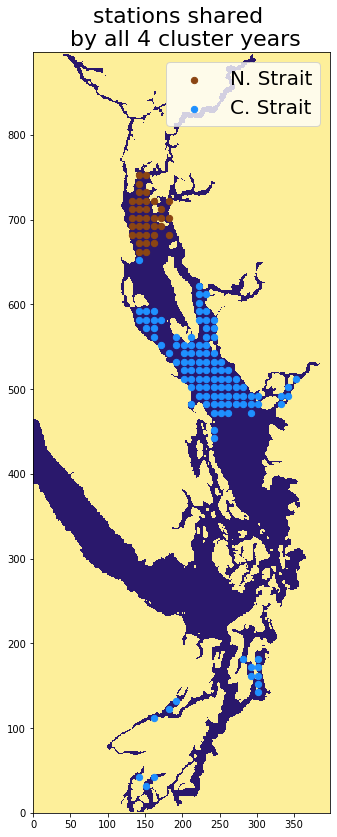

In [8]:
fig = plt.figure(figsize=(4*fact, 10*fact))
colors = ['saddlebrown','dodgerblue']
#####FWI
#2013 bio - cluslist [1 2 ]
ax1 = plt.subplot2grid((1,1),(0,0))

viz_tools.set_aspect(ax1)   
fmask = (grid.fmask[0,0,:,:])    
mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1, cmap = cm.cm.haline_r)


ax1.set_ylim([0,898])
ax1.set_xlim([0,398])

stn_x, stn_y = mf.make_stns(10)
d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)
labels = ['N. Strait', 'C. Strait']
#for j in range(0,len(cluslist)):


pts = ax1.scatter(common_north_x,common_north_y,s=40,c='saddlebrown', label='N. Strait' ,marker='o')
pts = ax1.scatter(common_south_x,common_south_y,s=40,c='dodgerblue', label='C. Strait' ,marker='o')


plt.legend(loc=1, fontsize = 20)
ax1.set_title('stations shared \n by all 4 cluster years',fontsize = 22)

In [14]:
import pickle

cluster_coords = dict()
cluster_coords =  {
    'N_strait': {'x': common_north_x,
                  'y': common_north_y,
                  },
        'S_strait': {'x': common_south_x,
                  'y': common_south_y,
                  }
}

pickle.dump(cluster_coords, open("cluster_coords.pkl", 'wb'))

ccoords_N = {'x': common_north_x,
                  'y': common_north_y,
                  }
ccoords_S = {'x': common_south_x,
                  'y': common_south_y,
            }
             
# with open('cluster_N.csv', 'w') as f:
#     for key in ccoords_N.keys():
#         f.write("%s,%s\n"%(key,ccoords_N[key]))
             
with open('cluster_S.csv', 'w') as f:
    for key in ccoords_S.keys():
        f.write("%s,%s\n"%(key,ccoords_S[key]))

In [11]:
import csv
with open('cluster_coords.csv', 'w') as f:
    for key in cluster_coords.keys():
        f.write("%s,%s\n"%(key,cluster_coords[key]))

In [ ]:
N_2013, N_2013s = clusters_spec_clusTUP('2013','bio',5,1)
S_2013, S_2013s = clusters_spec_clusTUP('2013','bio',5,2)

ccoords_N_2013 = {'x': list(N_2013[0,:]), 'y': list(N_2013[1,:])}
ccoords_S_2013 = {'x': list(S_2013[0,:]), 'y': list(S_2013[1,:])}

with open('cluster_2013_N.csv', 'w') as f:
    for key in ccoords_N_2013.keys():
        f.write("%s,%s\n"%(key,ccoords_N_2013[key]))
with open('cluster_2013_S.csv', 'w') as f:
    for key in ccoords_S_2013.keys():
        f.write("%s,%s\n"%(key,ccoords_S_2013[key]))        

N_2014, N_2014s = clusters_spec_clusTUP('2014','bio',5,1)
S_2014, S_2014s = clusters_spec_clusTUP('2014','bio',5,2)

ccoords_N_2014 = {'x': list(N_2014[0,:]), 'y': list(N_2014[1,:])}
ccoords_S_2014 = {'x': list(S_2014[0,:]), 'y': list(S_2014[1,:])}

with open('cluster_2014_N.csv', 'w') as f:
    for key in ccoords_N_2014.keys():
        f.write("%s,%s\n"%(key,ccoords_N_2014[key]))
with open('cluster_2014_S.csv', 'w') as f:
    for key in ccoords_S_2014.keys():
        f.write("%s,%s\n"%(key,ccoords_S_2014[key]))

N_2015, N_2015s = clusters_spec_clusTUP('2015','bio',5,3)
S_2015, S_2015s = clusters_spec_clusTUP('2015','bio',5,2)

ccoords_N_2015 = {'x': list(N_2015[0,:]), 'y': list(N_2015[1,:])}
ccoords_S_2015 = {'x': list(S_2015[0,:]), 'y': list(S_2015[1,:])}

with open('cluster_2015_N.csv', 'w') as f:
    for key in ccoords_N_2015.keys():
        f.write("%s,%s\n"%(key,ccoords_N_2015[key]))
with open('cluster_2015_S.csv', 'w') as f:
    for key in ccoords_S_2015.keys():
        f.write("%s,%s\n"%(key,ccoords_S_2015[key]))

N_2016, N_2016s = clusters_spec_clusTUP('2016','bio',5,3)
S_2016, S_2016s = clusters_spec_clusTUP('2016','bio',5,1)

ccoords_N_2016 = {'x': list(N_2016[0,:]), 'y': list(N_2016[1,:])}
ccoords_S_2016 = {'x': list(S_2016[0,:]), 'y': list(S_2016[1,:])}

with open('cluster_2016_N.csv', 'w') as f:
    for key in ccoords_N_2016.keys():
        f.write("%s,%s\n"%(key,ccoords_N_2016[key]))
with open('cluster_2016_S.csv', 'w') as f:
    for key in ccoords_S_2016.keys():
        f.write("%s,%s\n"%(key,ccoords_S_2016[key]))

In [27]:
list(N_2013[1,:])

[682,
 692,
 702,
 712,
 722,
 662,
 672,
 682,
 692,
 702,
 712,
 722,
 732,
 742,
 752,
 652,
 662,
 672,
 682,
 692,
 702,
 712,
 722,
 732,
 752,
 652,
 662,
 672,
 682,
 692,
 702,
 722,
 652,
 662,
 672,
 682,
 692,
 702,
 712,
 662,
 672,
 682,
 702,
 722,
 772,
 652,
 662,
 682,
 812,
 662,
 732,
 822,
 732,
 822,
 822,
 732]

In [26]:
type(common_north_x)

list